In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from ecotools.pi_client import pi_client

sns.set('paper')
# Option Paramater time_zone
# default timezone is time_zone='America/Los_Angeles' use https://www.iana.org/time-zones 

#pi = pi_client(username= r'ad3\username')
pi = pi_client(username = r'ad3\sbharadw')

buildings = pd.read_csv("/Users/sanab/Desktop/buildings.csv")

# Sum the hourly data into annual data

In [302]:
Demand_hourly = pd.read_csv("/Users/sanab/Desktop/buildings.csv",
                                      parse_dates=['Timestamp'],
                                      index_col=['Timestamp'],
                                      na_values=['999.99'])

In [303]:
Demand_hourly.head()

,ARC_ChilledWater_Demand_kBtu,Giedt_ChilledWater_Demand_kBtu,Wellman_Kerr_ChilledWater_Demand_kBtu,Student_Community_Center_MSB/Chilled_Water_Demand,Shields_ChilledWater_Demand_kBtu,ARC_Electricity_Demand_kBtu,Giedt_Electricity_Demand_kBtu,Wellman_Kerr_Electricity_Demand_kBtu,Student_Community_Center_MSB/Electricity_Demand,Shields_Electricity_Demand_kBtu,ARC_Steam_Demand_kBtu,Giedt_Steam_Demand_kBtu,Wellman_Kerr_Steam_Demand_kBtu,Student_Community_Center_MSB/Steam_Demand,Shields_Steam_Demand_kBtu
Timestamp,,,,,,,,,,,,,,,
2017-03-01 00:00:00,0.0,0.0,NaN,1.008402,18.00000,791.145983,22.705368,341.851016,46.418940,1217.761496,1630.257702,56.485579,527.280029,368.368357,2938.525118
2017-03-01 01:00:00,0.0,0.0,NaN,1.008394,19.92541,607.278429,31.704768,341.256610,46.278450,1451.812652,1639.854662,2.028000,580.848564,620.679379,3130.218018
2017-03-01 02:00:00,0.0,0.0,NaN,1.008394,27.00000,557.049372,26.986326,328.445811,34.277895,1436.775912,1479.422408,2.028000,619.554016,164.715841,3235.642859
2017-03-01 03:00:00,0.0,0.0,NaN,1.008394,27.00000,745.652367,16.440153,330.154231,31.593665,1447.114120,2438.496652,2.028000,565.596446,154.328597,2971.588738
2017-03-01 04:00:00,0.0,0.0,NaN,1.008394,27.00000,729.830072,20.208067,330.043259,33.069087,1499.801410,2348.647942,50.397891,631.598278,143.758811,3288.402100


In [29]:
Demand_hourly.index

DatetimeIndex(['2017-03-01 00:00:00', '2017-03-01 01:00:00',
               '2017-03-01 02:00:00', '2017-03-01 03:00:00',
               '2017-03-01 04:00:00', '2017-03-01 05:00:00',
               '2017-03-01 06:00:00', '2017-03-01 07:00:00',
               '2017-03-01 08:00:00', '2017-03-01 09:00:00',
               ...
               '2020-02-29 14:00:00', '2020-02-29 15:00:00',
               '2020-02-29 16:00:00', '2020-02-29 17:00:00',
               '2020-02-29 18:00:00', '2020-02-29 19:00:00',
               '2020-02-29 20:00:00', '2020-02-29 21:00:00',
               '2020-02-29 22:00:00', '2020-02-29 23:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=26301, freq=None)

# I added a scatter plot so that I could visualize how the hourly data for a specific building would look like

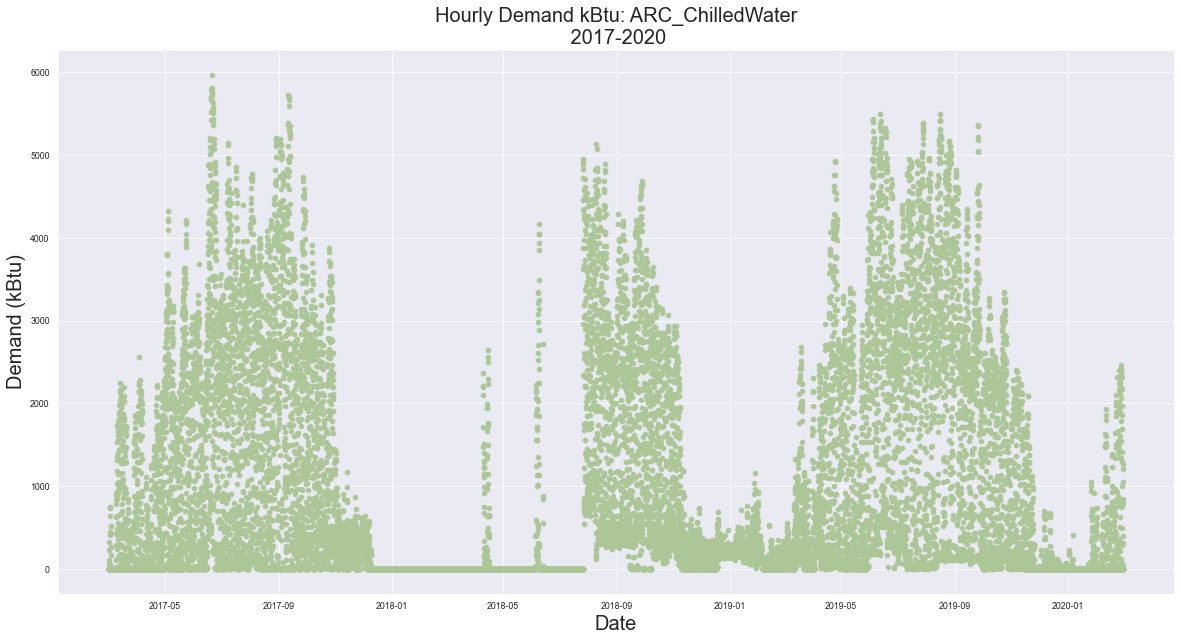

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.scatter(Demand_hourly.index.values,
           Demand_hourly['ARC_ChilledWater_Demand_kBtu'],
           color='#ADC698')

# Set title and labels for axes
ax.set_xlabel('Date',fontsize = 20)
ax.set_ylabel('Demand (kBtu)',fontsize = 20)
ax.set_title('Hourly Demand kBtu: ARC_ChilledWater\n 2017-2020',fontsize = 20)

plt.show()

In [31]:
Demand_annual = Demand_hourly.resample('Y').sum()

In [32]:
Demand_annual

,ARC_ChilledWater_Demand_kBtu,Giedt_ChilledWater_Demand_kBtu,Wellman_Kerr_ChilledWater_Demand_kBtu,Student_Community_Center_MSB/Chilled_Water_Demand,Shields_ChilledWater_Demand_kBtu,ARC_Electricity_Demand_kBtu,Giedt_Electricity_Demand_kBtu,Wellman_Kerr_Electricity_Demand_kBtu,Student_Community_Center_MSB/Electricity_Demand,Shields_Electricity_Demand_kBtu,ARC_Steam_Demand_kBtu,Giedt_Steam_Demand_kBtu,Wellman_Kerr_Steam_Demand_kBtu,Student_Community_Center_MSB/Steam_Demand,Shields_Steam_Demand_kBtu
Timestamp,,,,,,,,,,,,,,,
2017-12-31,7.685819e+06,681467.098999,2.625301e+06,83951.576041,1.089297e+07,5.613240e+06,285713.777899,3.248771e+06,347663.374662,9.761865e+06,4.826460e+06,232042.730331,3.225145e+06,1.765037e+06,6.277533e+06
2018-12-31,4.482478e+06,707840.933596,3.017599e+06,82930.365153,1.061000e+07,7.019596e+06,395007.368924,3.930688e+06,399017.689949,1.044349e+07,7.041503e+06,281272.929083,4.708380e+06,3.092868e+06,8.492369e+06
2019-12-31,8.737054e+06,735577.517755,2.139036e+06,53439.941738,1.063769e+07,7.168447e+06,414793.573908,3.569762e+06,377468.025861,1.020579e+07,6.454880e+06,463067.933013,4.922771e+06,3.361660e+06,1.166961e+07
2020-12-31,2.019894e+05,26289.928301,1.449960e+05,2143.073892,2.767022e+05,1.007963e+06,64329.833487,5.920297e+05,67851.675805,1.594541e+06,1.373224e+06,57798.280143,9.410609e+05,7.784406e+05,2.717770e+06


# I also added a bar plot to visualize the annual demand data for a specfic building

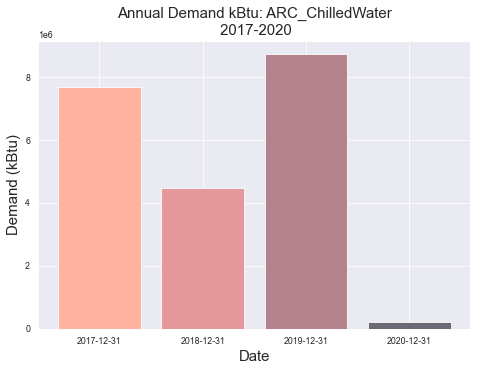

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

years = ['2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31']
num_kbtu = Demand_annual['ARC_ChilledWater_Demand_kBtu']
#low = min(num_kbtu)
#high = max(num_kbtu)
#plt.ylim(low - 1000, high + 1000)
plt.title('Annual Demand kBtu: ARC_ChilledWater\n 2017-2020',fontsize = 15)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Demand (kBtu)',fontsize = 15)

ax.bar(years,num_kbtu)

plt.bar(years, num_kbtu, color=['#ffb4a2', '#e5989b', '#b5838d', '#6d6875'])

plt.show()

# Create a copy of the buildings df called buildings2

In [11]:
Demand_annual.to_csv("/Users/sanab/Desktop/buildings2.csv")

In [133]:
buildings2 = pd.read_csv("/Users/sanab/Desktop/buildings2.csv")

In [134]:
buildings2

,Timestamp,ARC_ChilledWater_Demand_kBtu,Giedt_ChilledWater_Demand_kBtu,Wellman_Kerr_ChilledWater_Demand_kBtu,Student_Community_Center_MSB/Chilled_Water_Demand,Shields_ChilledWater_Demand_kBtu,ARC_Electricity_Demand_kBtu,Giedt_Electricity_Demand_kBtu,Wellman_Kerr_Electricity_Demand_kBtu,Student_Community_Center_MSB/Electricity_Demand,Shields_Electricity_Demand_kBtu,ARC_Steam_Demand_kBtu,Giedt_Steam_Demand_kBtu,Wellman_Kerr_Steam_Demand_kBtu,Student_Community_Center_MSB/Steam_Demand,Shields_Steam_Demand_kBtu
0,2017-12-31,7.685819e+06,681467.098999,2.625301e+06,83951.576041,1.089297e+07,5.613240e+06,285713.777899,3.248771e+06,347663.374662,9.761865e+06,4.826460e+06,232042.730331,3.225145e+06,1.765037e+06,6.277533e+06
1,2018-12-31,4.482478e+06,707840.933596,3.017599e+06,82930.365153,1.061000e+07,7.019596e+06,395007.368924,3.930688e+06,399017.689949,1.044349e+07,7.041503e+06,281272.929083,4.708380e+06,3.092868e+06,8.492369e+06
2,2019-12-31,8.737054e+06,735577.517755,2.139036e+06,53439.941738,1.063769e+07,7.168447e+06,414793.573908,3.569762e+06,377468.025861,1.020579e+07,6.454880e+06,463067.933013,4.922771e+06,3.361660e+06,1.166961e+07
3,2020-12-31,2.019894e+05,26289.928301,1.449960e+05,2143.073892,2.767022e+05,1.007963e+06,64329.833487,5.920297e+05,67851.675805,1.594541e+06,1.373224e+06,57798.280143,9.410609e+05,7.784406e+05,2.717770e+06


# Replace each "Electricity_Demand_kBtu", "ChilledWater_Demand_kBtu", and "Steam_Demand_kBtu" tag names in buildings2 with the appropriate and most recent annual kBtu usage

In [135]:
metadata = pd.read_csv("/Users/sanab/Desktop/metadata.csv")

In [136]:
metadata = metadata.drop([0,1,3,4,5,6,7,8,9,11,12,14,15,16,18], axis=0)

In [137]:
metadata.loc[13, 'Electricity_Demand_kBtu'] = 1007962.9991604200
metadata.loc[17, 'Electricity_Demand_kBtu'] = 64329.83348655690
metadata.loc[10, 'Electricity_Demand_kBtu'] = 592029.6746323900
metadata.loc[19, 'Electricity_Demand_kBtu'] = 67851.67580469760
metadata.loc[2, 'Electricity_Demand_kBtu'] = 1594541.321561180

In [203]:
metadata.loc[13, 'ChilledWater_Demand_kBtu'] = 201989.40913035900
metadata.loc[17, 'ChilledWater_Demand_kBtu'] = 26289.928301094900
metadata.loc[10, 'ChilledWater_Demand_kBtu'] = 144995.99596081600
metadata.loc[19, 'ChilledWater_Demand_kBtu'] = 2143.073891768370
metadata.loc[2, 'ChilledWater_Demand_kBtu'] = 276702.24799134100

In [204]:
metadata.loc[13, 'Steam_Demand_kBtu'] = 1373223.6660665500
metadata.loc[17, 'Steam_Demand_kBtu'] = 57798.28014284480
metadata.loc[10, 'Steam_Demand_kBtu'] = 941060.8777669560
metadata.loc[19, 'Steam_Demand_kBtu'] = 778440.6449766800
metadata.loc[2, 'Steam_Demand_kBtu'] = 2717770.204162900

# Replace each "Electricity_Demand_kBtu", "ChilledWater_Demand_kBtu", and "Steam_Demand_kBtu" tag names in buildings2 with the appropriate and most recent annual kBtu usage

In [205]:
sum_ArcAnnualUsage = metadata.loc[13, 'Electricity_Demand_kBtu'] + metadata.loc[13, 'ChilledWater_Demand_kBtu'] + metadata.loc[13, 'Steam_Demand_kBtu']

In [206]:
sum_GiedtAnnualUsage = metadata.loc[17, 'Electricity_Demand_kBtu'] + metadata.loc[17, 'ChilledWater_Demand_kBtu'] + metadata.loc[17, 'Steam_Demand_kBtu']


In [207]:
sum_WellmanAnnualUsage = metadata.loc[10, 'Electricity_Demand_kBtu'] + metadata.loc[10, 'ChilledWater_Demand_kBtu'] + metadata.loc[10, 'Steam_Demand_kBtu']

In [208]:
sum_SCCAnnualUsage = metadata.loc[19, 'Electricity_Demand_kBtu'] + metadata.loc[19, 'ChilledWater_Demand_kBtu'] + metadata.loc[19, 'Steam_Demand_kBtu']

In [209]:
sum_ShieldsAnnualUsage = metadata.loc[2, 'Electricity_Demand_kBtu'] + metadata.loc[2, 'ChilledWater_Demand_kBtu'] + metadata.loc[2, 'Steam_Demand_kBtu']

In [213]:
Arc_eui = sum_ArcAnnualUsage / metadata.loc[13, 'Outside Gross 50']
Giedt_eui = sum_GiedtAnnualUsage / metadata.loc[17, 'Outside Gross 50']
Wellman_eui = sum_WellmanAnnualUsage / metadata.loc[10, 'Outside Gross 50']
SCC_eui = sum_SCCAnnualUsage / metadata.loc[19, 'Outside Gross 50']
Shields_eui = sum_ShieldsAnnualUsage / metadata.loc[2, 'Outside Gross 50']

In [218]:
metadata.insert(7, "EUI", [Arc_eui, Giedt_eui, Wellman_eui, SCC_eui, Shields_eui], True)

# Print a summary table of Building EUI

In [221]:
metadata["EUI"]

2     15.023706
10     9.550711
13    36.033639
17    19.072822
19    11.192307
Name: EUI, dtype: float64

In [189]:
print("Arc_eui:", Arc_eui, "Giedt_eui:",Giedt_eui, "Wellman_eui:",Wellman_eui, "SCC_eui:",SCC_eui, "Shields_eui:",Shields_eui)

Arc_eui: 15.023706376394841 Giedt_eui: 9.550710548938005 Wellman_eui: 36.033638573333945 SCC_eui: 19.072821568949422 Shields_eui: 11.192307046609077


# Create 2 visualizations comparing the EUIs at each of these buildings with other columns from the Buildings dataset

Text(0, 0.5, 'Demand (kBtu) vs # of Spaces')

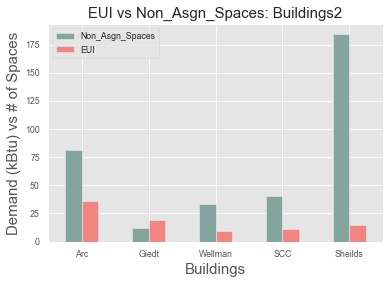

In [316]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

index = ['Arc', 'Giedt', 'Wellman', 'SCC', 'Sheilds']
num_kBtu = [metadata.loc[13, 'EUI'], metadata.loc[17, 'EUI'], metadata.loc[10, 'EUI'], metadata.loc[19, 'EUI'],metadata.loc[2, 'EUI']]
Non_Asgn_Spaces = [metadata.loc[13, 'Non-Asgn Spaces'], metadata.loc[17, 'Non-Asgn Spaces'], metadata.loc[10, 'Non-Asgn Spaces'], metadata.loc[19, 'Non-Asgn Spaces'],metadata.loc[2, 'Non-Asgn Spaces']]

df4 = pd.DataFrame({'Non_Asgn_Spaces': Non_Asgn_Spaces,
                   'EUI': num_kBtu}, index=index)
ax = df4.plot.bar(rot=0,color=['#84a59d', '#f28482'])

plt.title('EUI vs Non_Asgn_Spaces: Buildings2',fontsize = 15)
plt.xlabel('Buildings',fontsize = 15)
plt.ylabel('Demand (kBtu) vs # of Spaces',fontsize = 15)

# ax.bar(names,num_kBtu)

# plt.show()

Text(0, 0.5, 'Demand (kBtu) vs # of Spaces')

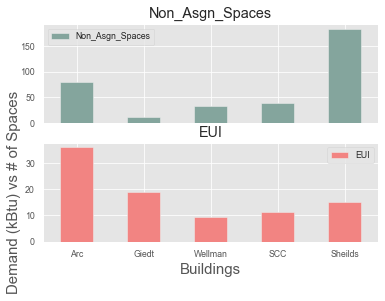

In [317]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

index = ['Arc', 'Giedt', 'Wellman', 'SCC', 'Sheilds']
num_kBtu = [metadata.loc[13, 'EUI'], metadata.loc[17, 'EUI'], metadata.loc[10, 'EUI'], metadata.loc[19, 'EUI'],metadata.loc[2, 'EUI']]
Non_Asgn_Spaces = [metadata.loc[13, 'Non-Asgn Spaces'], metadata.loc[17, 'Non-Asgn Spaces'], metadata.loc[10, 'Non-Asgn Spaces'], metadata.loc[19, 'Non-Asgn Spaces'],metadata.loc[2, 'Non-Asgn Spaces']]

df4 = pd.DataFrame({'Non_Asgn_Spaces': Non_Asgn_Spaces,
                   'EUI': num_kBtu}, index=index)
ax = df4.plot.bar(rot=0,color=['#84a59d', '#f28482'], subplots = True)

# plt.title('EUI vs Non_Asgn_Spaces: Buildings2',fontsize = 15)
plt.xlabel('Buildings',fontsize = 15)
plt.ylabel('Demand (kBtu) vs # of Spaces',fontsize = 15)

# ax.bar(names,num_kBtu)

# plt.show()

Text(0, 0.5, 'Demand (kBtu) vs Total Rooms')

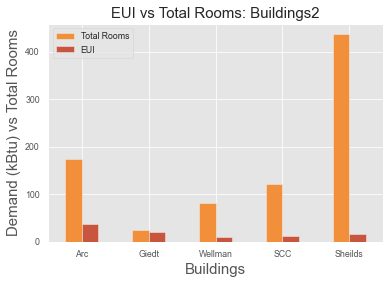

In [318]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

index = ['Arc', 'Giedt', 'Wellman', 'SCC', 'Sheilds']
num_kBtu = [metadata.loc[13, 'EUI'], metadata.loc[17, 'EUI'], metadata.loc[10, 'EUI'], metadata.loc[19, 'EUI'],metadata.loc[2, 'EUI']]
TotalRooms = [metadata.loc[13, 'Total Rooms'], metadata.loc[17, 'Total Rooms'], metadata.loc[10, 'Total Rooms'], metadata.loc[19, 'Total Rooms'],metadata.loc[2, 'Total Rooms']]

df4 = pd.DataFrame({'Total Rooms': TotalRooms,
                   'EUI': num_kBtu}, index=index)

ax = df4.plot.bar(rot=0,color=['#f28f3b', '#c8553d'])

plt.title('EUI vs Total Rooms: Buildings2',fontsize = 15)
plt.xlabel('Buildings',fontsize = 15)
plt.ylabel('Demand (kBtu) vs Total Rooms',fontsize = 15)

# ax.bar(names,num_kBtu)

# plt.show()

Text(0, 0.5, 'Demand (kBtu) vs Total Rooms')

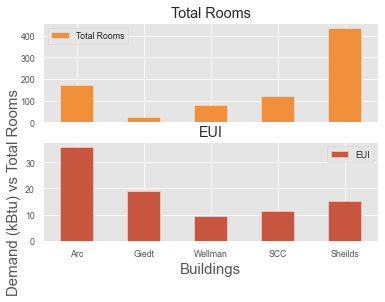

In [319]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

index = ['Arc', 'Giedt', 'Wellman', 'SCC', 'Sheilds']
num_kBtu = [metadata.loc[13, 'EUI'], metadata.loc[17, 'EUI'], metadata.loc[10, 'EUI'], metadata.loc[19, 'EUI'],metadata.loc[2, 'EUI']]
TotalRooms = [metadata.loc[13, 'Total Rooms'], metadata.loc[17, 'Total Rooms'], metadata.loc[10, 'Total Rooms'], metadata.loc[19, 'Total Rooms'],metadata.loc[2, 'Total Rooms']]

df4 = pd.DataFrame({'Total Rooms': TotalRooms,
                   'EUI': num_kBtu}, index=index)

ax = df4.plot.bar(rot=0,color=['#f28f3b', '#c8553d'], subplots=True)

# plt.title('EUI vs Total Rooms: Buildings2',fontsize = 15)
plt.xlabel('Buildings',fontsize = 15)
plt.ylabel('Demand (kBtu) vs Total Rooms',fontsize = 15)

# ax.bar(names,num_kBtu)

# plt.show()

In [ ]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])

index = ['Arc', 'Giedt', 'Wellman', 'SCC', 'Sheilds']
num_kBtu = [metadata.loc[13, 'EUI'], metadata.loc[17, 'EUI'], metadata.loc[10, 'EUI'], metadata.loc[19, 'EUI'],metadata.loc[2, 'EUI']]
TotalRooms = [metadata.loc[13, 'Net Usable'], metadata.loc[17, 'Total Rooms'], metadata.loc[10, 'Total Rooms'], metadata.loc[19, 'Total Rooms'],metadata.loc[2, 'Total Rooms']]

df4 = pd.DataFrame({'Total Rooms': TotalRooms,
                   'EUI': num_kBtu}, index=index)

ax = df4.plot.bar(rot=0,color=['#f28f3b', '#c8553d'], subplots=True)

# plt.title('EUI vs Total Rooms: Buildings2',fontsize = 15)
plt.xlabel('Buildings',fontsize = 15)
plt.ylabel('Demand (kBtu) vs Total Rooms',fontsize = 15)

# ax.bar(names,num_kBtu)

# plt.show()

# I struggled on making a combined plot for the visualizations of comparing the building EUI with another column in buildings2 because I read the instructions stating y-axis should be EUI and x-axis should be date, construction etc however when I created a bar graph it was easier to combine the y-axis for the two columns which I know is not right so I split it up into two different subplots with there own accurate x,y axes. Any feedback or help on this would be highly appreciated!
